In [1]:
# Importing the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Loading the dataframe
customer_df= pd.read_csv('customer_value_analysis.csv')

In [3]:
# Main features of the dataframe
display(customer_df.shape)
display(customer_df.head())
display(customer_df.info())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [4]:
# Renaming the column names

cols = [] 
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(" ", "_"))
customer_df.columns = cols

In [5]:
# Change the type of effective_to_date column to DateTime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

customer_df['effective_to_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


C:\Users\olabi\AppData\Local\Temp\ipykernel_30544\2957685532.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [6]:
# Checking NaN values per column.
customer_df.isnull().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [7]:
# Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

def separated_numerical_categorical_dataframe(df):
    """
    This function groups all numerical columnns into a dataframe (numerical dataframe) and all non-numerical columns into a dataframe i.e categorical dataframe
    
    
    """
    numerical_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(exclude=['number']).columns


    df_numerical = df[numerical_columns]
    df_categorical = df[categorical_columns]

    return df_numerical, df_categorical


In [8]:
#checking ou the function
numerical_df, categorical_df = separated_numerical_categorical_dataframe(customer_df)

#numerical_df.head()
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
# Dropping the ID column in the categorical dataframe.
categorical_df.drop('customer', axis=1, inplace=True)

categorical_df.head()

C:\Users\olabi\AppData\Local\Temp\ipykernel_30544\2973490158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df.drop('customer', axis=1, inplace=True)


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


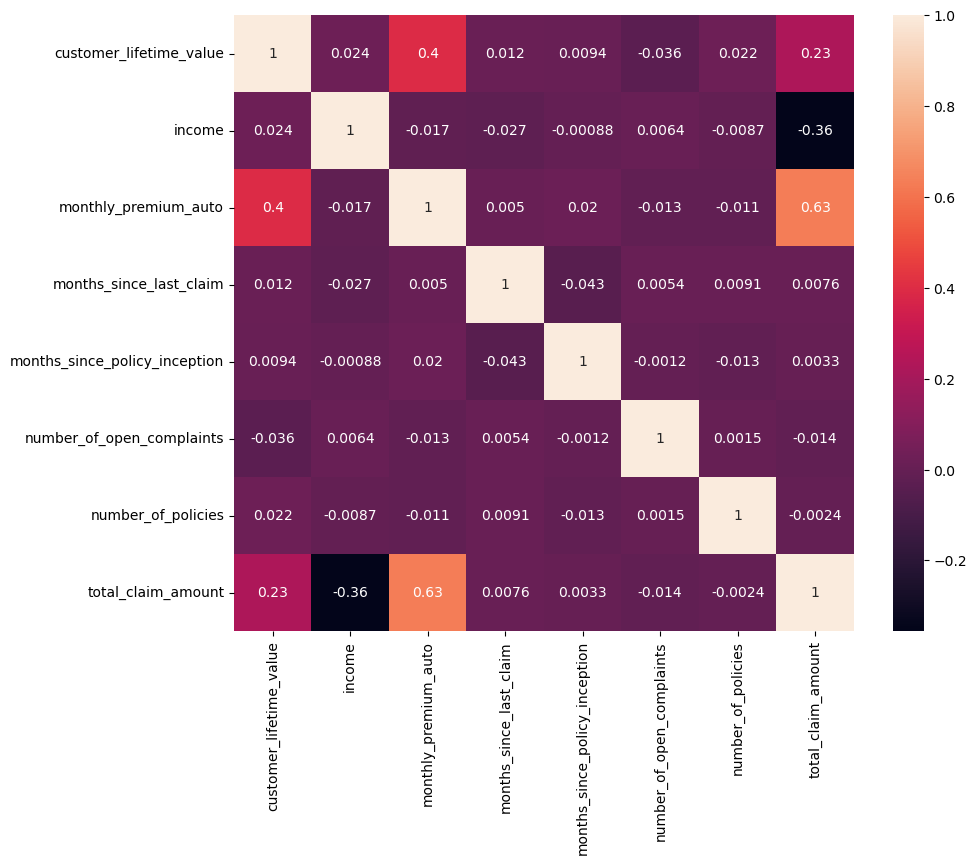

In [10]:
# Correlation matrix for the numerical variables
corr_matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, ax = ax)
plt.show()


#The pair of variables that has the highest correlation value (0.63) is monthly_premium_auto and total_claim_amount. This degree of correlation is expected because the total amount of money the customer has claimed as a result of unfortuname incidences should depend on the king of insurance premium the customer pays monthly. 

In [11]:
def separated_continuous_discrete_dataframe(df, threshold=36):
    
    """
   The function takes a dataframe as input, groups all numerical columns into numerical dataframe and further separate the numerical dataframe into continuous or discrate dataframe using the unique value threshold of 36. 

    """
    
    numerical_columns = df.select_dtypes(include=['number']).columns

    continuous_columns = []
    discrete_columns = []

    for column in numerical_columns:
        unique_values = df[column].nunique()

        if unique_values > threshold:
            continuous_columns.append(column)
        else:
            discrete_columns.append(column)

            
    continuous_df = df[continuous_columns]
    discrete_df = df[discrete_columns]

    return continuous_df, discrete_df


In [12]:
# Checking out the function

continuous_df, discrete_df = separated_continuous_discrete_dataframe(customer_df)
continuous_df.head()
#discrete_df.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [13]:
def barplot_discrete_columns(discrete_df):
 """
 This function takes the numerical discrete dataframe as input and returns barplots for all the discrete columns.
 """
    
 plt.figure(figsize=(16, 16))

 for column in discrete_df.columns:
        
        sns.countplot(x=column, data=discrete_df, palette='crest')
        plt.title(f'Bar Plot for {column}')
        plt.show()



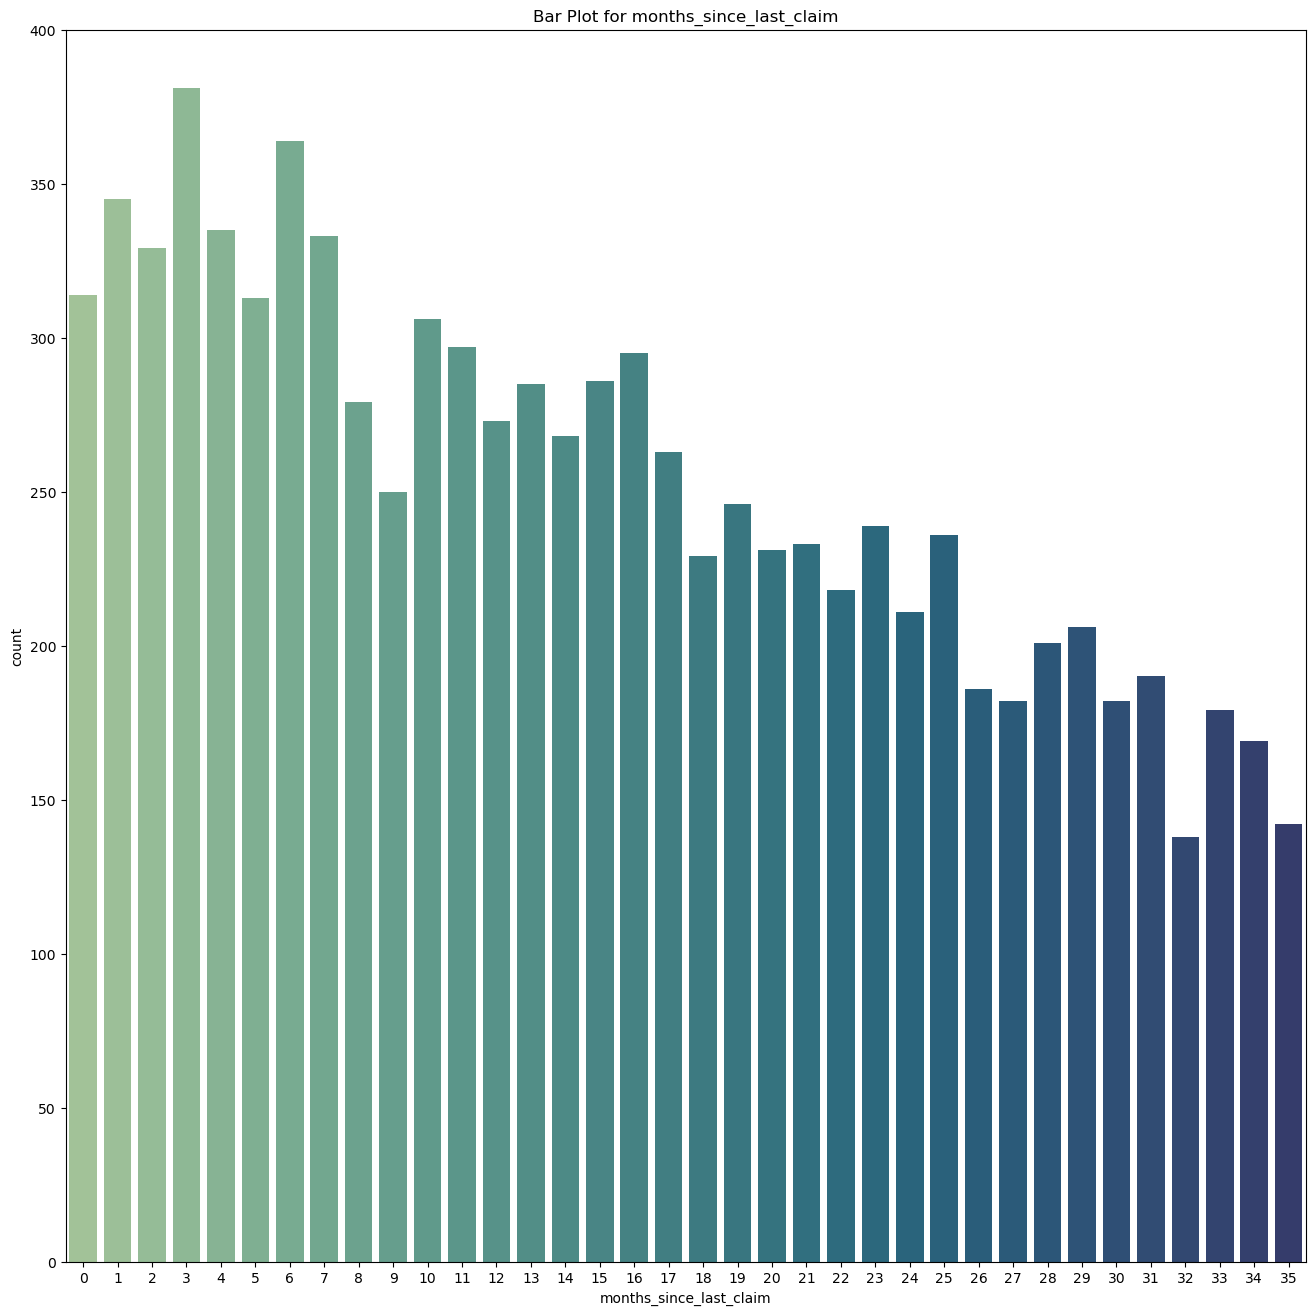

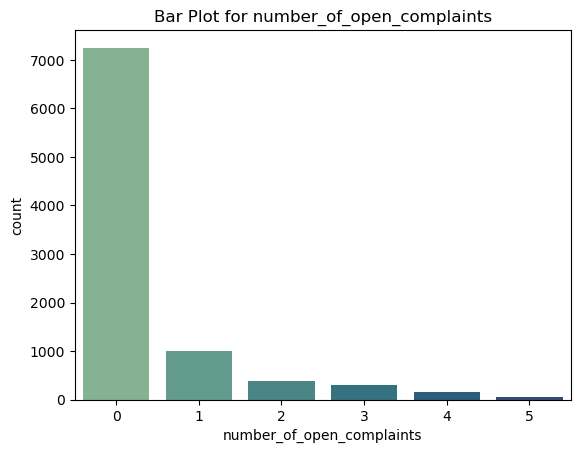

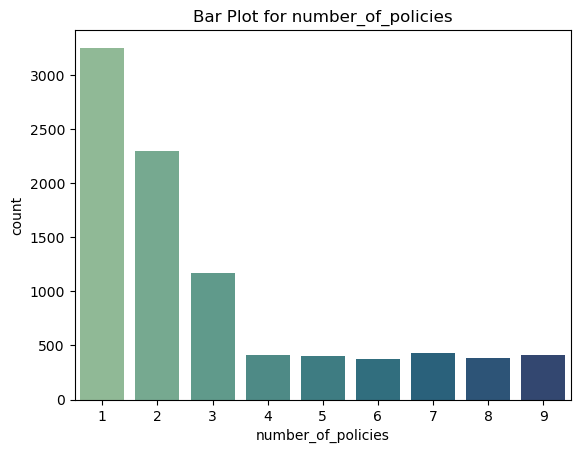

In [14]:
# Checking out the function

barplot_discrete_columns(discrete_df)

In [15]:
def histplot_continuous_columns(continuous_df):
    """
     This function takes the numerical continuous dataframe as input and returns histogram plots for all the numerical continuous columns.
    """
    
    plt.figure(figsize=(16, 16))

    for column in continuous_df.columns:
        
        sns.histplot(continuous_df[column], bins=20, color='orange')
        plt.title(f'Histogram for {column}')
        plt.show()


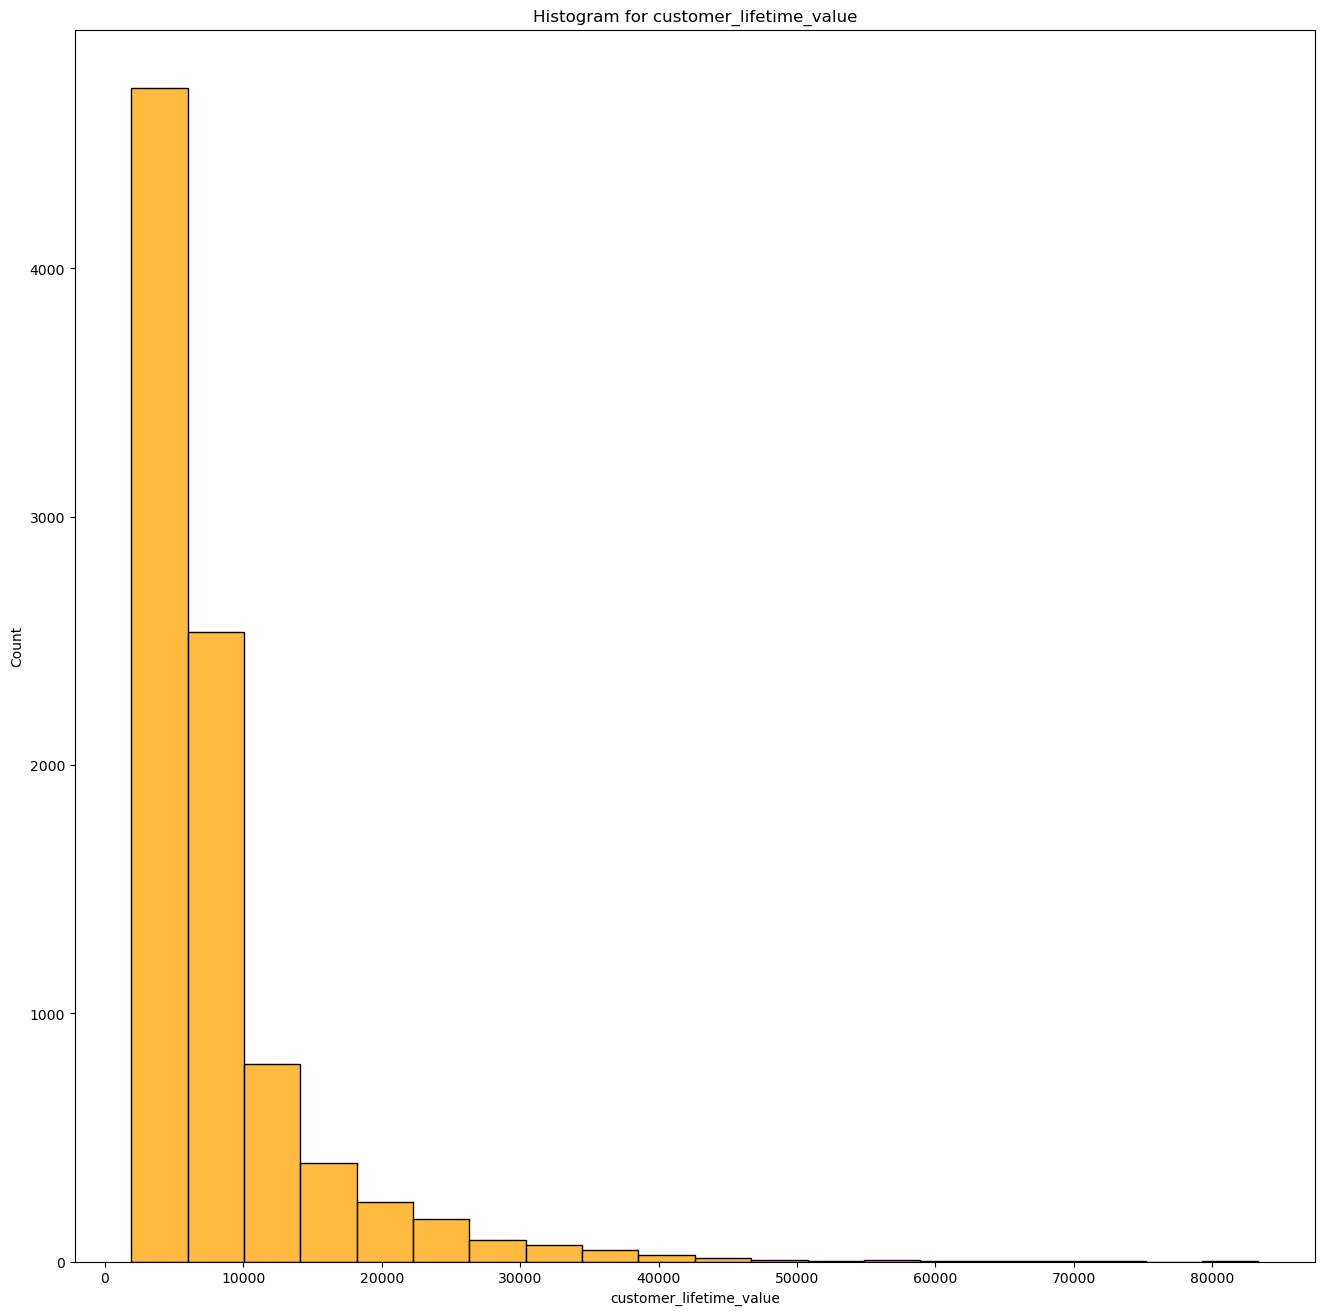

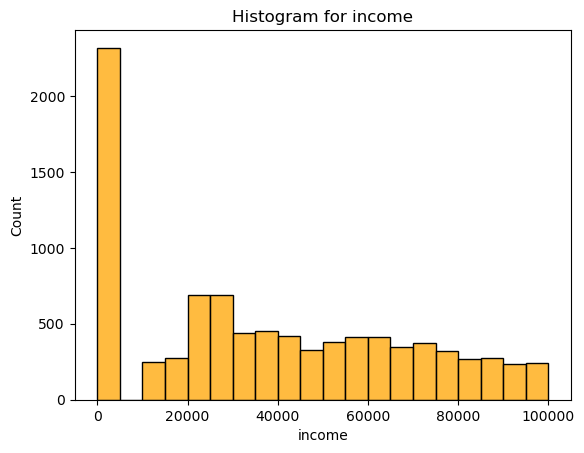

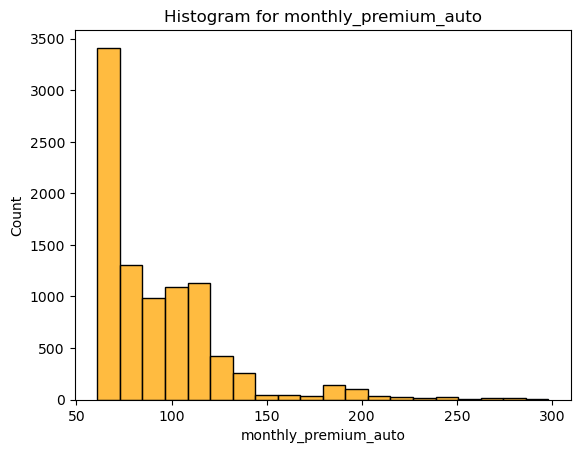

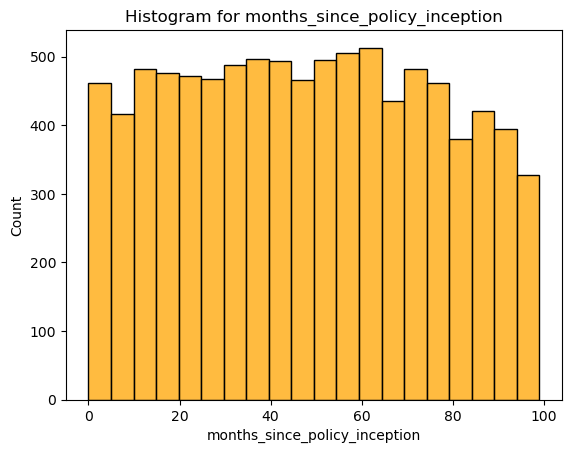

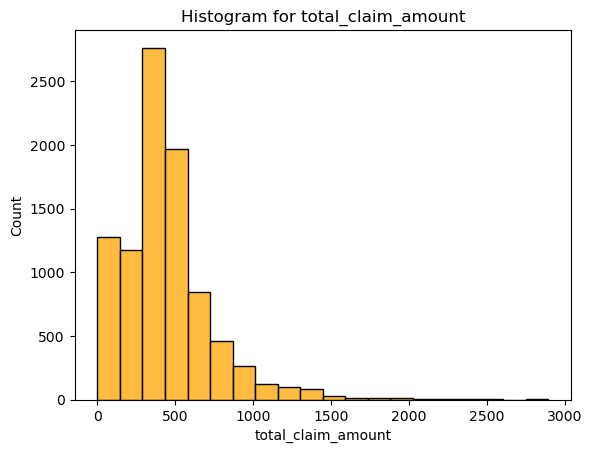

In [16]:
# Checking out the function

histplot_continuous_columns(continuous_df)


All the above plotted histograms are not symmetrical. The values are also not of the same range. Hence the data needs to transformed and then scaled.

In [17]:
def boxplot_for_continuous_columns(continuous_df):
    """
    This function takes the numerical continuous dataframe as input and returns  boxplots for all the numerical continuous columns in order to identify the outliers.
    """
    
    plt.figure(figsize=(16, 16))

    for column in continuous_df.columns:
       
        sns.boxplot(x=continuous_df[column], color='blue')
        plt.title(f'Box Plot for {column}')
        plt.show()


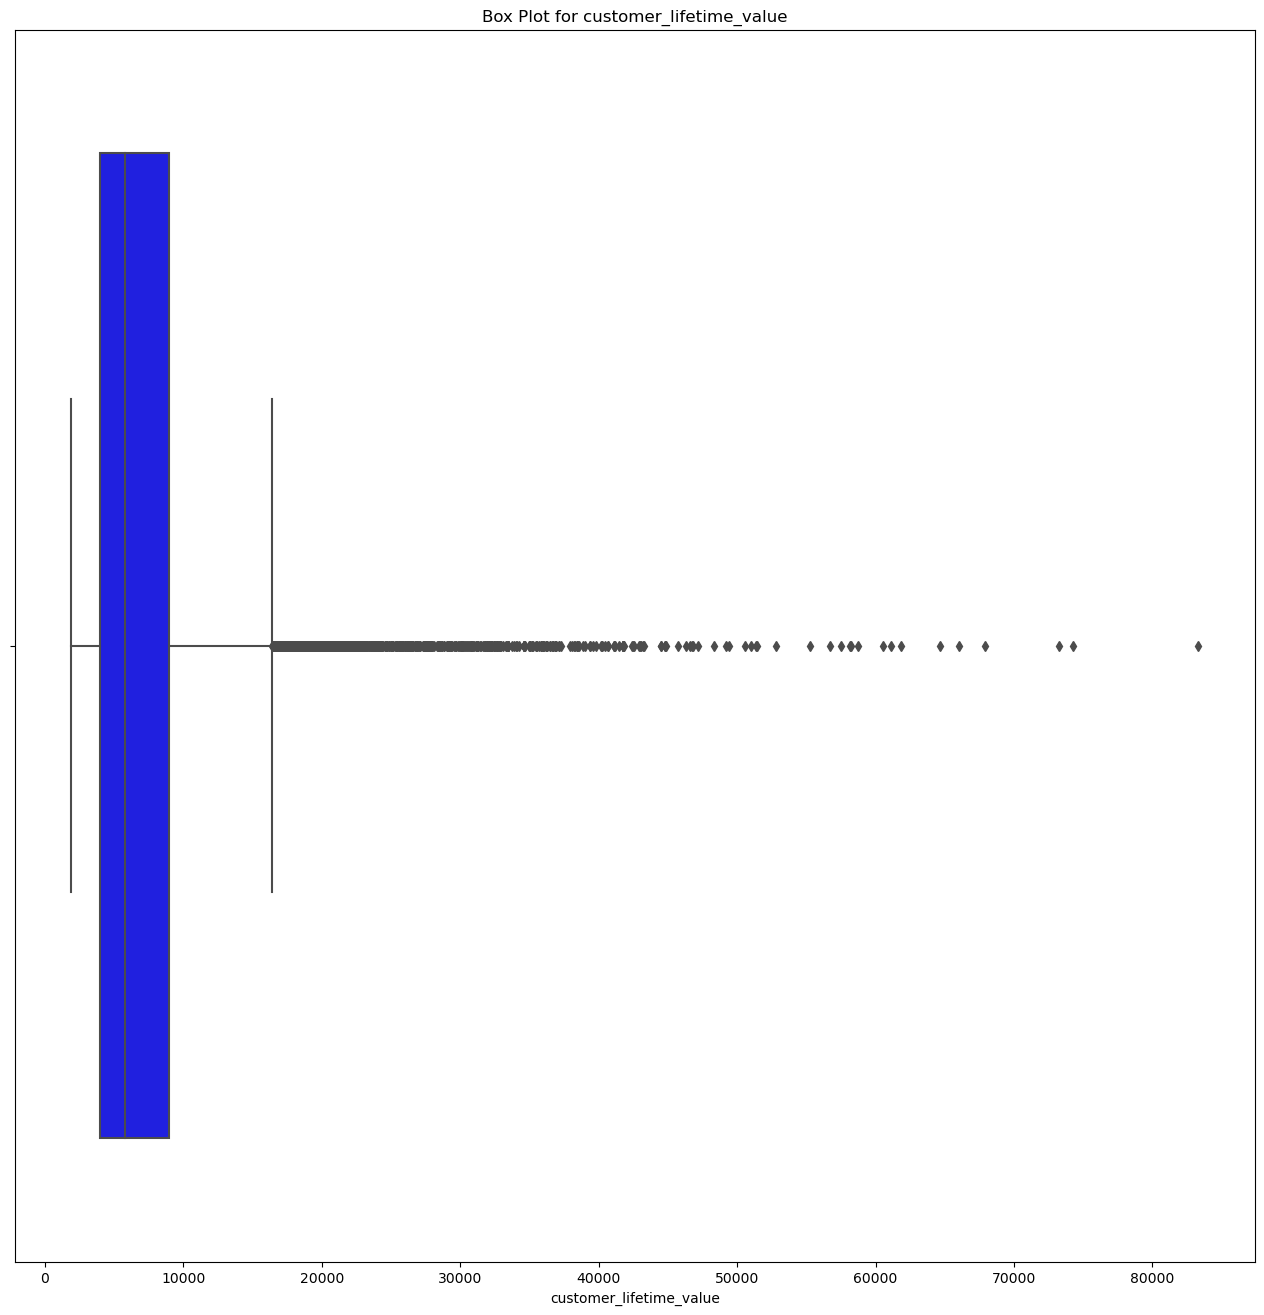

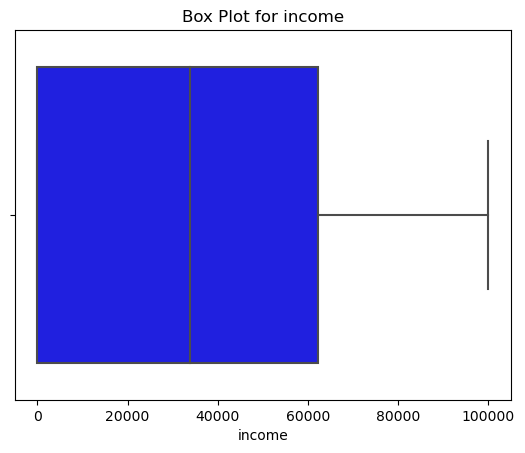

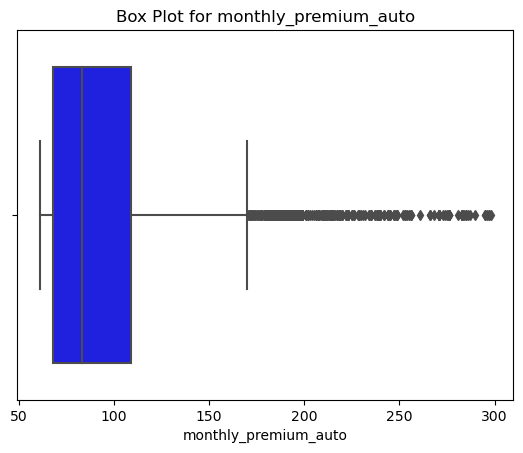

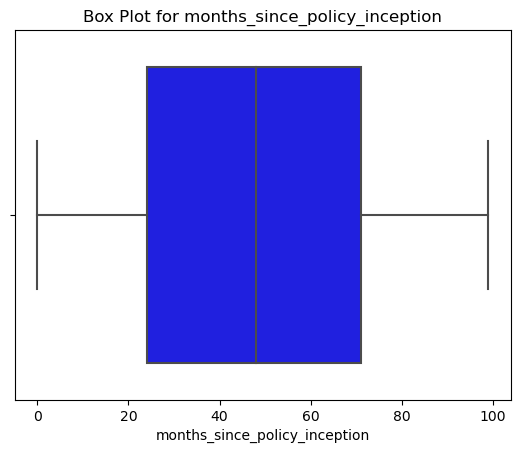

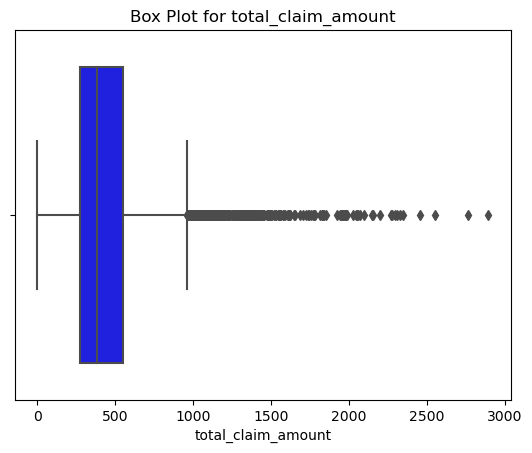

In [18]:
# Checking out the function

boxplot_for_continuous_columns(continuous_df)

# Lab: Cleaning Categorical Data

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [19]:
# checking out the categorical dataframe
display(categorical_df)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [20]:
# effective_to_date column needs to be dropped.

categorical_df = categorical_df.drop(columns=['effective_to_date'])
#categorical_columns = categorical_columns.drop(columns=['effective_to_date'])


In [21]:
def create_countplots(df: pd.DataFrame):
    '''
    This function creates countplots for all the columns given in a DataFrame.
    Input: pd.DataFrame
    Output: Countplot for each column. 
        '''
    for col in df.columns:
        if len(df[col].unique())<6:
            fig, ax = plt.subplots(figsize=(8,3))
            sns.countplot(df, x=df[col], order=df[col].value_counts().index)
        else:
            fig, ax = plt.subplots(figsize=(8,3))
            sns.countplot(df, y=df[col], order=df[col].value_counts().index)
    return plt.show()

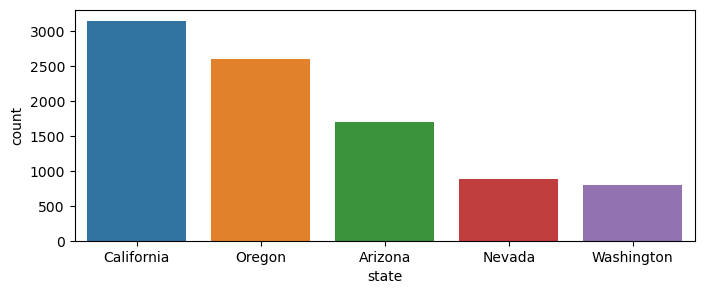

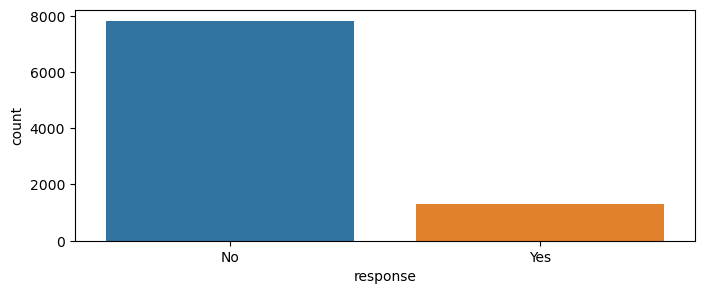

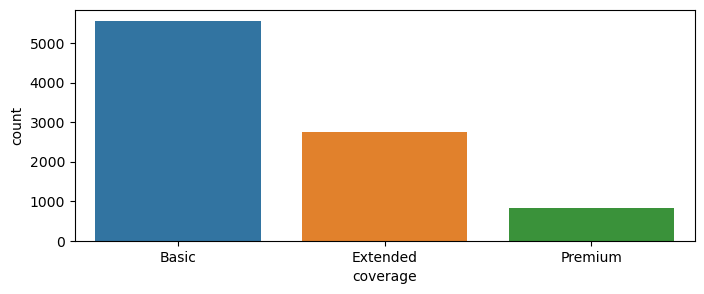

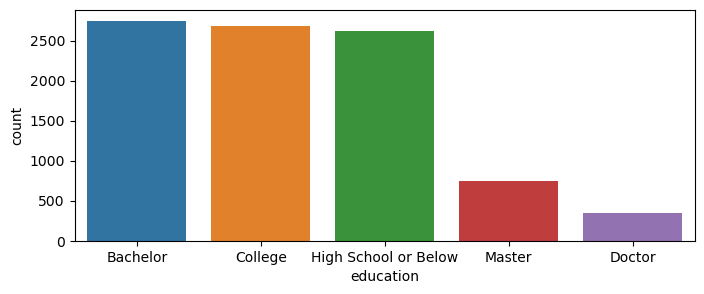

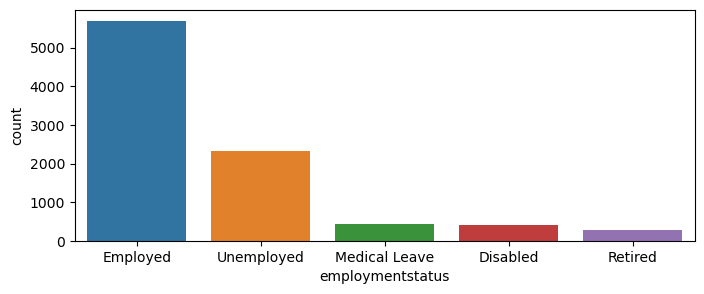

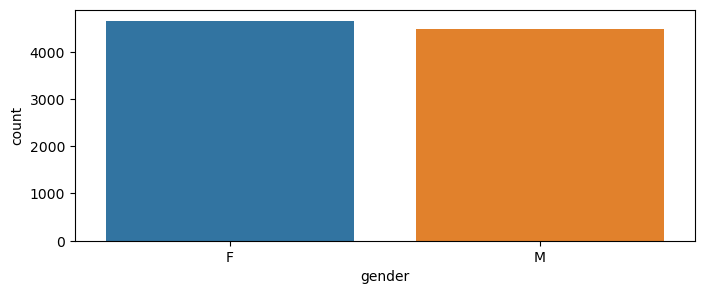

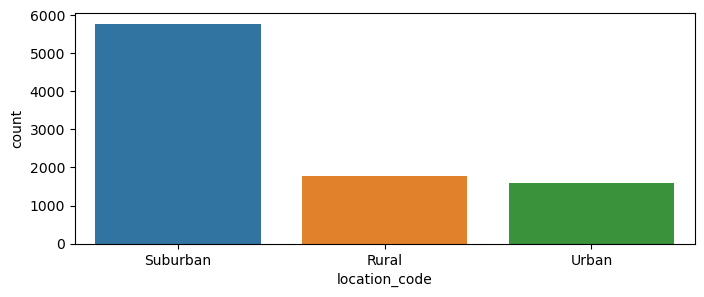

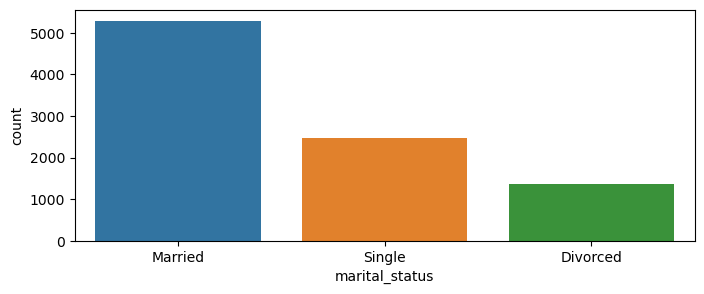

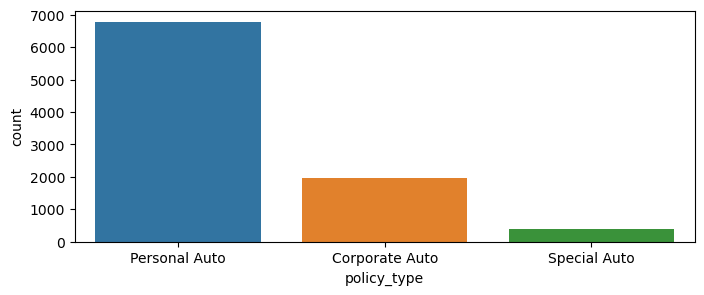

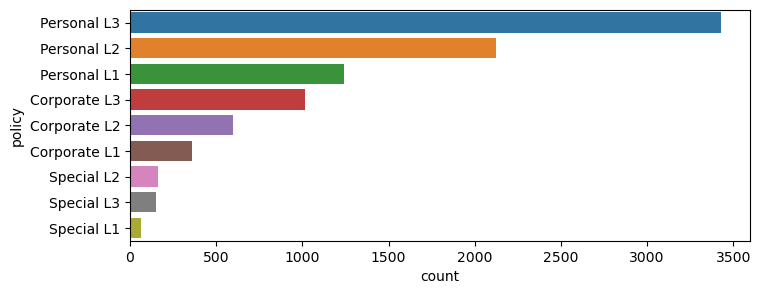

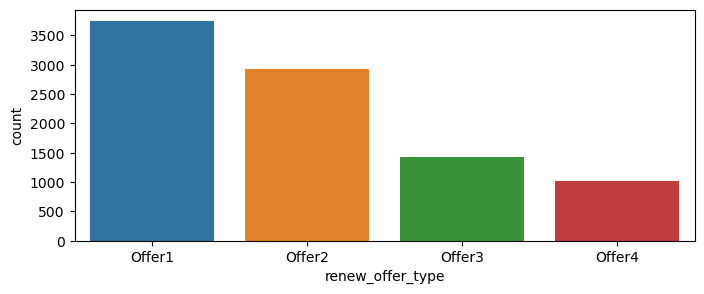

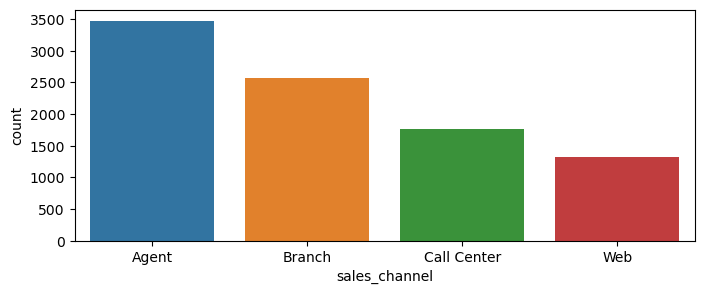

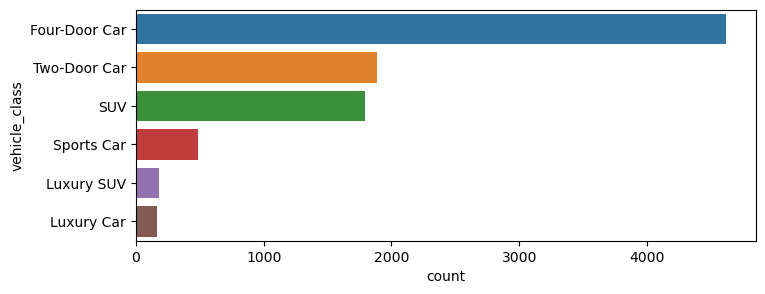

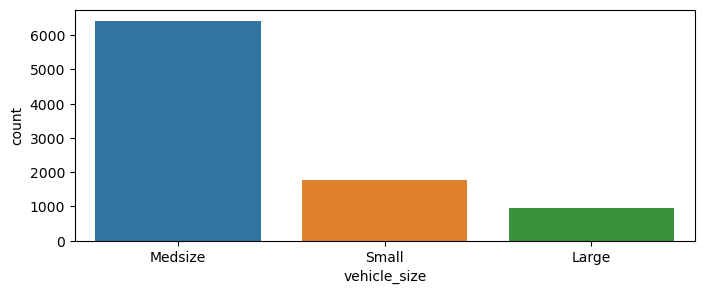

In [22]:
create_countplots(categorical_df)

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [23]:
categorical_df = categorical_df.drop('policy_type', axis = 1)


In [24]:
def grouping_values(column: str) -> str:
    
    '''
    This function groups the categories in a column.
    Input: column -> str
    Output: Grouped categories in a column to reduce cardinality.
    '''

    policy = {"L1": ["Personal L1", "Corporate L1", "Special L1"],
              "L2": ["Personal L2", "Corporate L2", "Special L2"],
              "L3": ["Personal L3", "Corporate L3", "Special L3"]}
               
    policy_new = [ key for key, value in policy.items() if column in value ]
    
    return policy_new[0]


In [25]:
# applying the function
categorical_df['policy'] = categorical_df['policy'].apply(grouping_values)
categorical_df['policy'].value_counts(dropna=False)

policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64

3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

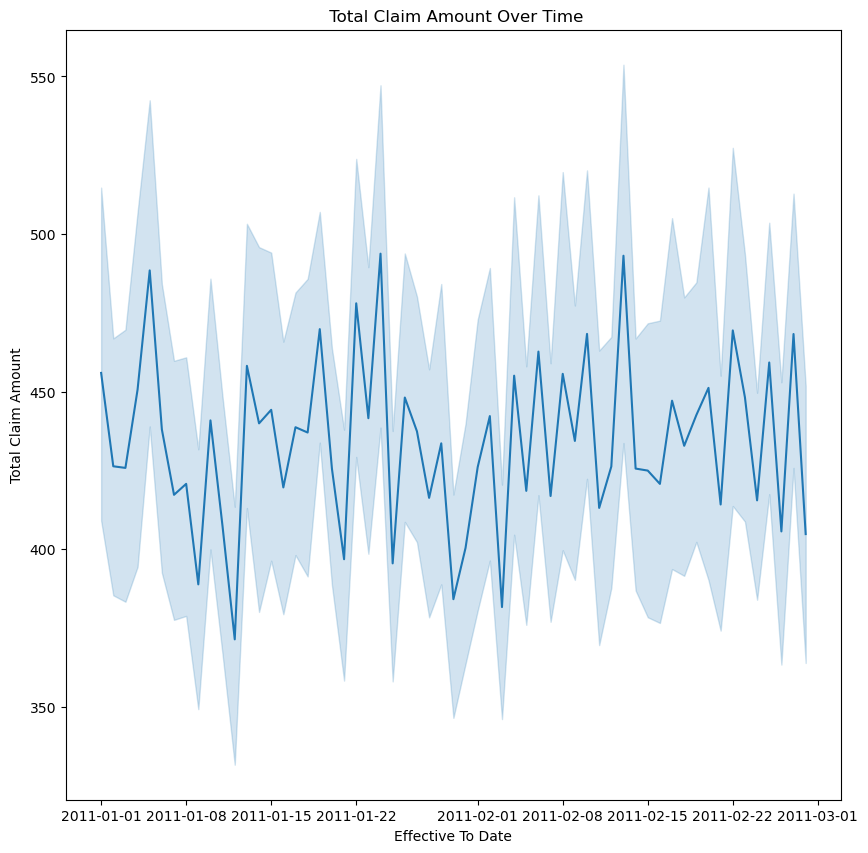

In [26]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.lineplot(data=customer_df, x='effective_to_date', y='total_claim_amount')

plt.title(' Total Claim Amount Over Time')
plt.xlabel('Effective To Date')
plt.ylabel('Total Claim Amount')

plt.show()


4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount

In [27]:
time_df = pd.DataFrame()

In [28]:
time_df['day'] = customer_df['effective_to_date'].dt.day
time_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
time_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = customer_df['effective_to_date'].dt.month_name()
time_df['total_claim_amount'] = customer_df['total_claim_amount']

display(time_df)

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [29]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_target = time_df.groupby('day_name')['total_claim_amount'].sum().round(2).reindex(index=list_of_correct_days)

display(total_target)

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

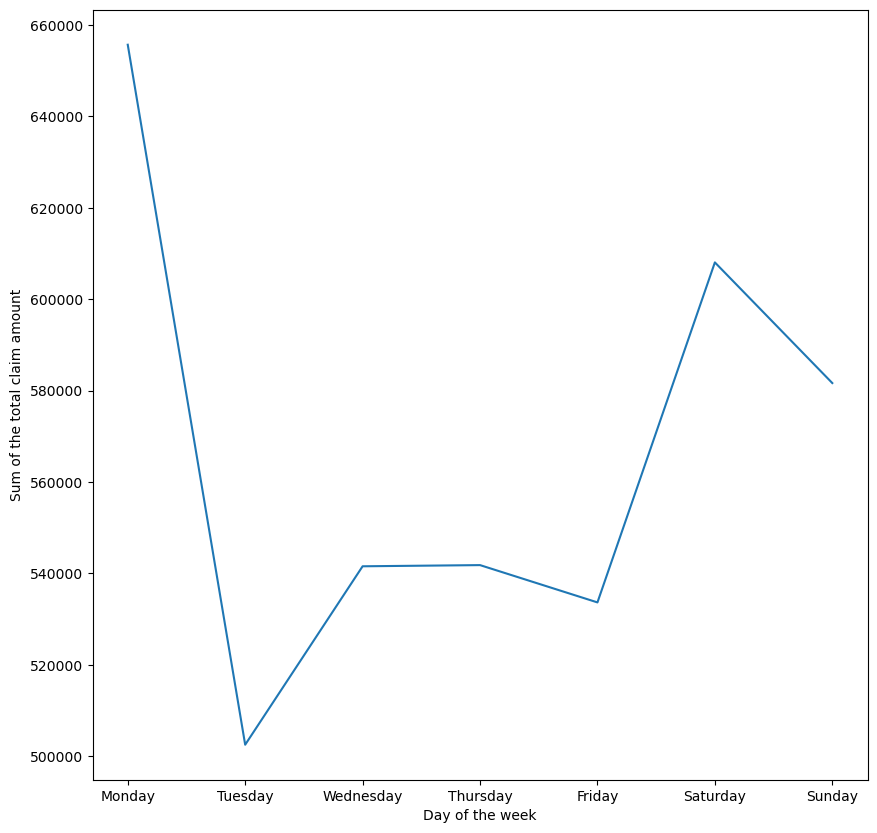

In [30]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.lineplot(data = total_target)
ax.set_xlabel("Day of the week")
ax.set_ylabel("Sum of the total claim amount")
plt.show()

In [31]:
# Monday records the highest total claim amount, follwed by Saturday. Tuesday has the lowest claim amount for the week.

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [32]:
list_of_correct_values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_target_claims = time_df.groupby(['day_name']).agg({'total_claim_amount':'count'}).reindex(index=list_of_correct_values)
total_target_claims

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


 8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [33]:
median_target = time_df.groupby('day_name')['total_claim_amount'].median().round(2)
median_target = median_target.sort_values(ascending=False)
display(median_target)

day_name
Thursday     395.33
Wednesday    392.24
Monday       385.74
Sunday       383.72
Saturday     379.20
Tuesday      378.49
Friday       371.80
Name: total_claim_amount, dtype: float64

9. Plot the median "target" by day of the week name using a seaborn barplot


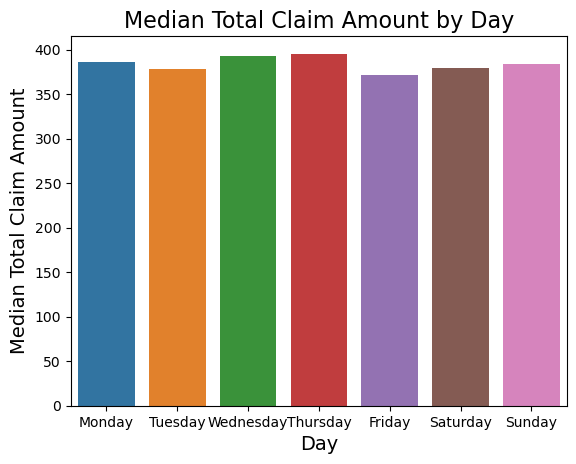

In [34]:
sns.barplot(x=median_target.index, y=median_target.values, order = list_of_correct_days)

plt.title('Median Total Claim Amount by Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Median Total Claim Amount', fontsize=14)
plt.show()

10. What can you conclude from this analysis?

In [35]:
# there seem to be no significant difference in the median total claim amount by day

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [36]:
list_of_correct_values = ['January', 'February']
total_target_by_month = time_df.groupby('month')['total_claim_amount'].sum().round(2).reindex(index=list_of_correct_values)

display(total_target_by_month)

month
January     2117142.86
February    1847824.19
Name: total_claim_amount, dtype: float64

12. Can you do a monthly analysis given the output of the previous series? Why?

In [37]:
# it would be impossible to do a monthly analysis from the output generated above because we only have 2 months.  For monthly analysis, we need more data for the other months. 

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [38]:
def remove_outliers_zscore(df: pd.DataFrame, threshold: int = 3):
    '''
    Input:
    df: Pandas DataFrame

    Output:
    Column of the given Pandas Dataframe without the outliers.
    '''

    df2 = df.copy()
    outliers = []
    
    for column in df2.columns:
        df2['abs-z-score'] = np.abs((df2[column] - df2[column].mean()) / df2[column].std(ddof=1))
        outliers = df2[df2['abs-z-score'] > threshold].index.tolist()
        df2 = df2.drop(outliers)

    return df2

14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [39]:
continuous_clean_df = remove_outliers_zscore(continuous_df, 3)

continuous_clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score
0,2763.519279,56274,69,5,384.811147,0.102761
1,6979.535903,0,94,42,1131.464935,2.856867
2,12887.431650,48767,108,38,566.472247,0.617317
3,7645.861827,0,106,65,529.881344,0.472276
4,2813.692575,43836,73,44,138.130879,1.080566
...,...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764,0.842323
9130,3096.511217,21604,79,28,379.200000,0.125003
9131,8163.890428,0,85,37,790.784983,1.506460
9132,7524.442436,21941,96,3,691.200000,1.111720


15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [40]:
time = time_df[['day', 'day_name']]
concat_df = pd.concat([continuous_clean_df, discrete_df, categorical_df, time], axis=1)
final_df = concat_df.dropna().reset_index(drop=True)

display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,0.102761,32,0,1,Washington,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,2.856867,13,0,8,Arizona,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,0.617317,18,0,2,Nevada,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,0.472276,18,0,7,California,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,1.080566,12,0,1,Washington,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,0.842323,18,0,2,California,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,0.125003,14,0,1,California,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,1.506460,9,3,2,California,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,1.111720,34,0,3,California,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday


16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [41]:
concat_df['total_claim_amount'] = concat_df.pop('total_claim_amount')
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,0.102761,32,0,1,Washington,No,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,384.811147
1,6979.535903,0.0,94.0,42.0,2.856867,13,0,8,Arizona,No,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,1131.464935
2,12887.431650,48767.0,108.0,38.0,0.617317,18,0,2,Nevada,No,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,566.472247
3,7645.861827,0.0,106.0,65.0,0.472276,18,0,7,California,No,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,529.881344
4,2813.692575,43836.0,73.0,44.0,1.080566,12,0,1,Washington,No,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,NaN,NaN,NaN,NaN,NaN,15,0,2,California,No,...,Suburban,Single,L3,Offer4,Branch,Two-Door Car,Small,11,Friday,NaN
9103,NaN,NaN,NaN,NaN,NaN,24,0,4,California,No,...,Suburban,Single,L3,Offer1,Agent,Luxury SUV,Large,1,Saturday,NaN
9109,NaN,NaN,NaN,NaN,NaN,23,0,1,California,No,...,Suburban,Single,L3,Offer1,Branch,SUV,Medsize,25,Tuesday,NaN
9110,NaN,NaN,NaN,NaN,NaN,10,0,2,California,Yes,...,Suburban,Married,L2,Offer2,Agent,Sports Car,Medsize,14,Friday,NaN


17. Turn the response column values into (Yes=1/No=0).

In [42]:
final_df['response'].replace({'Yes': 1, 'No': 0}, inplace=True)

final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,0.102761,32,0,1,Washington,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,2.856867,13,0,8,Arizona,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,0.617317,18,0,2,Nevada,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,0.472276,18,0,7,California,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,1.080566,12,0,1,Washington,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,0.842323,18,0,2,California,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,0.125003,14,0,1,California,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,1.506460,9,3,2,California,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,1.111720,34,0,3,California,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday


18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [43]:
final_df['education'] = final_df['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'})

final_df['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [44]:
final_df['employmentstatus'] = final_df['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired': 'Inactive'})

final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

20. Deal with column Gender turning the values into (1/0).

In [45]:
final_df['gender'].replace({'F': 1, 'M': 0}, inplace=True)

final_df['gender'].unique()

array([1, 0], dtype=int64)

21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [46]:
final_df['vehicle_class'] = final_df['vehicle_class'].replace({'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'})

final_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".


In [47]:
implicit_ordering = {'Basic': 1, 'Extended': 2, 'Premium': 3}
final_df['coverage'] = final_df['coverage'].map(implicit_ordering)

display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,0.102761,32,0,1,Washington,...,1,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,2.856867,13,0,8,Arizona,...,1,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,0.617317,18,0,2,Nevada,...,1,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,0.472276,18,0,7,California,...,0,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,1.080566,12,0,1,Washington,...,0,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,0.842323,18,0,2,California,...,0,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,0.125003,14,0,1,California,...,1,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,1.506460,9,3,2,California,...,0,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,1.111720,34,0,3,California,...,0,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday


23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [48]:
implicit_ordering = {'Employed': 1, 'Inactive': 2, 'Unemployed': 3}
final_df['employmentstatus'] = final_df['employmentstatus'].map(implicit_ordering)
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,0.102761,32,0,1,Washington,...,1,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,2.856867,13,0,8,Arizona,...,1,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,0.617317,18,0,2,Nevada,...,1,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,0.472276,18,0,7,California,...,0,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,1.080566,12,0,1,Washington,...,0,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,0.842323,18,0,2,California,...,0,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,0.125003,14,0,1,California,...,1,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,1.506460,9,3,2,California,...,0,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,1.111720,34,0,3,California,...,0,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday


24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".


In [49]:
implicit_ordering = {'Urban': 1, 'Suburban': 2, 'Rural': 3}
final_df['location_code'] = final_df['location_code'].map(implicit_ordering)
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,0.102761,32,0,1,Washington,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,2.856867,13,0,8,Arizona,...,1,2,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,0.617317,18,0,2,Nevada,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,0.472276,18,0,7,California,...,0,2,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,1.080566,12,0,1,Washington,...,0,3,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,0.842323,18,0,2,California,...,0,1,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,0.125003,14,0,1,California,...,1,2,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,1.506460,9,3,2,California,...,0,2,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,1.111720,34,0,3,California,...,0,2,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday


25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".


In [50]:
implicit_ordering = {'Large': 1, 'Medsize': 2, 'Small': 3}
final_df['vehicle_size'] = final_df['vehicle_size'].map(implicit_ordering)
display(final_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,0.102761,32,0,1,Washington,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,24,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,2.856867,13,0,8,Arizona,...,1,2,Single,L3,Offer3,Agent,Four-Door Car,2,31,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,0.617317,18,0,2,Nevada,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,19,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,0.472276,18,0,7,California,...,0,2,Married,L2,Offer1,Call Center,SUV,2,20,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,1.080566,12,0,1,Washington,...,0,3,Single,L1,Offer1,Agent,Four-Door Car,2,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,0.842323,18,0,2,California,...,0,1,Married,L1,Offer2,Web,Four-Door Car,2,10,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,0.125003,14,0,1,California,...,1,2,Divorced,L3,Offer1,Branch,Four-Door Car,2,12,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,1.506460,9,3,2,California,...,0,2,Single,L2,Offer1,Branch,Four-Door Car,2,6,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,1.111720,34,0,3,California,...,0,2,Married,L2,Offer3,Branch,Four-Door Car,1,3,Thursday


26. Get a dataframe with the categorical nominal columns

In [51]:
selected_cols = categorical_df.columns.tolist()
categorical_nominal_columns = final_df[selected_cols].select_dtypes(include='int64')
display(categorical_nominal_columns)

,response,coverage,employmentstatus,gender,location_code,vehicle_size
0,0,1,1,1,2,2
1,0,2,3,1,2,2
2,0,3,1,1,2,2
3,0,1,3,0,2,2
4,0,1,1,0,3,2
...,...,...,...,...,...,...
8570,0,1,1,0,1,2
8571,1,2,1,1,2,2
8572,0,2,3,0,2,2
8573,0,2,1,0,2,1


 27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie: levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [52]:
categorical_cols = categorical_nominal_columns.columns.tolist()

levels = []

for cols in categorical_cols:

    unique_values_cat_nom = final_df[cols].unique().tolist()

    levels.append(unique_values_cat_nom)
    
levels

[[0, 1], [1, 2, 3], [1, 3, 2], [1, 0], [2, 3, 1], [2, 3, 1]]

28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels 

In [53]:
from sklearn.preprocessing import OneHotEncoder

# Sort each level in the 'levels' list
sorted_levels = [sorted(level) for level in levels]

# Instantiate OneHotEncoder with drop set to 'first' and categories set to sorted_levels
encoder = OneHotEncoder(drop='first', categories=sorted_levels)

# Fit the encoder with the values of the DataFrame
encoder.fit(categorical_nominal_columns.values)

# Display the encoder object
print(encoder)
categorical_nominal_encoded =encoder.transform(categorical_nominal_columns).toarray()
col_names = encoder.get_feature_names_out(categorical_nominal_columns.columns)
categorical_nominal_encoded  = pd.DataFrame(categorical_nominal_encoded, columns=col_names,  index=categorical_nominal_columns.index)

OneHotEncoder(categories=[[0, 1], [1, 2, 3], [1, 2, 3], [0, 1], [1, 2, 3],
                          [1, 2, 3]],
              drop='first')


C:\Users\olabi\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [54]:
display(categorical_nominal_encoded.head())

,response_1,coverage_2,coverage_3,employmentstatus_2,employmentstatus_3,gender_1,location_code_2,location_code_3,vehicle_size_2,vehicle_size_3
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# LAB: Comparing Regression Models

1. Define X and y

In [59]:
y = final_df['total_claim_amount']
X = final_df.drop(['total_claim_amount'], axis=1)


2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31

In [60]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [61]:
# split numericals and categoricals
#X_train_df = pd.DataFrame(X_train, columns=X.columns)
#X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train.select_dtypes(include = np.number) 
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object) 
X_test_cat  = X_test.select_dtypes(include = object)

4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [64]:
encoder = OneHotEncoder(drop = 'first')
encoder.fit(X_train_cat)

X_train_cat_np = encoder.transform(X_train_cat).toarray()
X_test_cat_np  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_np, columns = encoder.get_feature_names_out(), index = X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_np,  columns = encoder.get_feature_names_out(),index = X_test_cat.index)

In [71]:
display(X_train_cat_encoded_df)
display(X_test_cat_encoded_df)

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,marital_status_Married,marital_status_Single,policy_L2,...,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
7257,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5720,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8478,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
826,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3735,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,marital_status_Married,marital_status_Single,policy_L2,...,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
2296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4306,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5074,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1684,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2405,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2043,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df

In [66]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

#fit-transform train
X_train_num_transformed = transformer.fit_transform(X_train_num)

#transform test
X_test_num_transformed = transformer.transform(X_test_num)

#cast to pd DataFrame
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=(X_train_num.columns), index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=(X_test_num.columns), index=X_test_num.index)

In [70]:
display(X_train_num_transformed_df)
display(X_test_num_transformed_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,vehicle_size,day
7257,1.254780,-1.662875,1.312075,-0.403151,1.667470,-0.698167,-0.508609,-0.066679,-0.403674,1.193921,1.437959,-1.017820,-0.020547,-0.156137,-1.886653
5720,-1.502490,0.235429,-1.144354,1.275008,0.577371,-0.135818,-0.508609,-1.134627,-0.403674,-0.773705,-0.763100,0.982492,-1.657486,-0.156137,1.255993
8210,-1.758357,-1.662875,-1.541686,0.393123,1.385627,0.245320,-0.508609,-1.134627,-0.403674,-0.773705,1.437959,0.982492,1.596052,-0.156137,1.061837
3063,-0.076610,-1.662875,-0.071004,0.393123,1.223103,-0.036060,1.921569,0.868793,-0.403674,1.193921,1.437959,-1.017820,-0.020547,-0.156137,-1.702819
8478,-0.826154,0.180443,0.807702,0.295321,0.965212,-0.698167,-0.508609,-1.134627,2.477245,-0.773705,0.992661,0.982492,-0.020547,-0.156137,1.061837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,-0.330862,0.901365,1.205773,1.100574,0.030781,0.154228,-0.508609,-1.134627,2.477245,1.597700,-0.763100,0.982492,-0.020547,1.689514,-0.092346
28,1.301769,1.000437,1.087640,0.295321,-0.195747,1.533074,2.011232,-0.066679,-0.403674,1.597700,-0.763100,0.982492,-0.020547,-2.049844,-1.702819
826,0.654601,-1.662875,-0.127329,0.862053,-1.360896,-0.698167,-0.508609,-0.066679,-0.403674,1.193921,1.437959,-1.017820,-0.020547,-0.156137,1.255993
3735,-0.330862,0.901365,1.205773,1.100574,0.030781,0.154228,-0.508609,-1.134627,2.477245,1.597700,-0.763100,0.982492,-0.020547,1.689514,-0.092346


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,vehicle_size,day
2296,-0.215250,0.896246,-1.144354,0.739978,-0.969102,-0.967315,2.023394,1.658115,2.477245,-0.773705,-0.763100,-1.017820,-0.020547,-0.156137,0.347412
4306,0.866255,0.465699,1.312075,1.641510,0.233572,1.192979,-0.508609,0.506547,-0.403674,1.193921,-0.763100,0.982492,-0.020547,-0.156137,0.963269
5074,-0.324084,0.703730,1.249617,1.188241,0.114524,1.399949,-0.508609,-1.134627,2.477245,-0.773705,-0.763100,-1.017820,-0.020547,-0.156137,-0.323827
1684,-1.115593,1.020217,-0.185418,-0.255762,-1.027810,-0.828374,-0.508609,-1.134627,-0.403674,1.193921,-0.763100,0.982492,-1.657486,-2.049844,-1.229531
6296,-0.249609,1.038877,-1.541686,-0.516907,1.087002,-1.680526,-0.508609,1.306339,-0.403674,-0.773705,-0.763100,-1.017820,1.596052,-0.156137,-0.690050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,-1.888305,-1.662875,-1.238045,1.558220,-1.070524,0.060520,-0.508609,-1.134627,-0.403674,-0.773705,1.437959,0.982492,-0.020547,-0.156137,-0.690050
7608,0.631238,0.795424,-0.802284,1.188241,1.237449,-1.465593,-0.508609,-0.066679,-0.403674,-0.773705,-0.763100,-1.017820,1.596052,-0.156137,1.540430
2405,0.700636,0.800144,-0.648679,-0.365867,-0.239631,0.587530,-0.508609,-0.066679,-0.403674,-0.773705,-0.763100,0.982492,-1.657486,-0.156137,0.020261
2043,0.441767,0.971957,0.409774,-0.964393,-1.523451,0.060520,-0.508609,0.506547,-0.403674,1.193921,-0.763100,0.982492,-0.020547,-2.049844,0.557804


6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [67]:
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)

7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit-transform train
X_train_new_scaled = scaler.fit_transform(X_train_new)

#transform test
X_test_new_scaled = scaler.transform(X_test_new)

#cast to pd DataFrame
X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled, columns=(X_train_new.columns), index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled, columns=(X_test_new.columns), index=X_test_new.index)

In [72]:
display(X_train_new_scaled_df)
display(X_test_new_scaled_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,...,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
7257,0.768989,0.000000,0.776334,0.453342,0.845859,0.347162,0.000000,0.382401,0.0,0.82973,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5720,0.156696,0.683148,0.108090,0.902013,0.590405,0.502666,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8210,0.099877,0.000000,0.000000,0.666233,0.779812,0.608060,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,0.473334,0.000000,0.400083,0.666233,0.741726,0.530251,0.958363,0.717367,0.0,0.82973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8478,0.306886,0.663360,0.639125,0.640085,0.681292,0.347162,0.000000,0.000000,1.0,0.00000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,0.416874,0.922800,0.747416,0.855376,0.462317,0.582870,0.000000,0.000000,1.0,1.00000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
28,0.779424,0.958454,0.715279,0.640085,0.409233,0.964156,0.993722,0.382401,0.0,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
826,0.635710,0.000000,0.384760,0.791605,0.136191,0.347162,0.000000,0.382401,0.0,0.82973,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3735,0.416874,0.922800,0.747416,0.855376,0.462317,0.582870,0.000000,0.000000,1.0,1.00000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,abs-z-score,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,...,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
2296,0.442547,0.920958,0.108090,0.758968,0.228004,0.272736,0.998518,1.000000,1.0,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4306,0.682711,0.766016,0.776334,1.000000,0.509839,0.870111,0.000000,0.587657,0.0,0.82973,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5074,0.418379,0.851677,0.759343,0.878815,0.481941,0.927343,0.000000,0.000000,1.0,0.00000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1684,0.242612,0.965572,0.368958,0.492748,0.214247,0.311157,0.000000,0.000000,0.0,0.82973,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6296,0.434917,0.972288,0.000000,0.422929,0.709832,0.075515,0.000000,0.874039,0.0,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,0.071020,0.000000,0.082602,0.977732,0.204237,0.556958,0.000000,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7608,0.630522,0.884675,0.201146,0.878815,0.745088,0.134950,0.000000,0.382401,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2405,0.645933,0.886374,0.242933,0.463310,0.398949,0.702689,0.000000,0.382401,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2043,0.588447,0.948205,0.530873,0.303289,0.098098,0.556958,0.000000,0.587657,0.0,0.82973,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [73]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_new_scaled_df, y_train) 

y_train_pred = linear_model.predict(X_train_new_scaled_df)
y_test_pred  = linear_model.predict(X_test_new_scaled_df)

9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

- Error_metric - Value 
- MAE - value
- MSE - value
- RMSE - value
- MAPE - value
- R2 - value

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    
    This function gives the error metrics for y
    Inputs: A list in order y_real_train, y_real_test, y_pred_train, y_pred_test
    Outputs: A Dataframe
    
    '''
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # Mean absolute Error
    MAE_train = mean_absolute_error(y_train, y_train_pred)
    MAE_test  = mean_absolute_error(y_test, y_test_pred)

    # Mean squared error
    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test  = mean_squared_error(y_test, y_test_pred)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
    RMSE_test  = mean_squared_error(y_test, y_test_pred, squared=False)

    # R2
    R2_train = r2_score(y_train, y_train_pred)
    R2_test  = r2_score(y_test, y_test_pred)

    results = {"Metric": ["MAE", "MSE", "RMSE","R2"], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [75]:
error_metrics_report(y_test, y_test_pred, y_train, y_train_pred)

,Metric,Train,Test
0,MAE,119.96,120.53
1,MSE,22841.10,23391.68
2,RMSE,151.13,152.94
3,R2,0.54,0.52


11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [76]:
from sklearn.model_selection import train_test_split

def regression_train_models(model_list, X_train, y_train, test_size=0.3, random_state=31):
    '''
    This function trains different models at the same time
    Input: A list of the models to train, the X_train and the y_train
    Output: A list of trained models 
    '''
    
    trained_models = []

    for model in model_list:
        # Split the data 
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Append the trained model to the list
        trained_models.append(model)

    return trained_models


12. Use the function to train the following models (with default settings):

- LinearRegressor

- KNeighborsRegressor

- MLPRegressor

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

trained_models = regression_train_models(models, X_train_new_scaled_df, y_train)
trained_models


C:\Users\olabi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

13. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?

In [78]:
metrics = []

for model in trained_models:
    y_train_pred = model.predict(X_train_new_scaled_df)
    y_test_pred = model.predict(X_test_new_scaled_df)
    print(f'Error metrics for {model}:')
    display(error_metrics_report(y_test, y_test_pred, y_train, y_train_pred))

Error metrics for LinearRegression():


,Metric,Train,Test
0,MAE,119.95,120.67
1,MSE,22903.38,23498.20
2,RMSE,151.34,153.29
3,R2,0.54,0.52


Error metrics for KNeighborsRegressor():


,Metric,Train,Test
0,MAE,115.62,126.51
1,MSE,24899.12,29403.46
2,RMSE,157.79,171.47
3,R2,0.49,0.40


Error metrics for MLPRegressor():


,Metric,Train,Test
0,MAE,127.31,128.40
1,MSE,27069.38,27686.69
2,RMSE,164.53,166.39
3,R2,0.45,0.44
